In [65]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

d = 3
num_pts = 40
omegas = np.linspace(0,2*np.pi,num_pts, endpoint = False)
q0,q1 = cirq.LineQubit.range(2)

In [66]:
theta_true = 0.15
phi_true = 0.1
u_gate = cirq.FSimGate( theta = theta_true, phi = phi_true)


In [67]:


def run_qspe_experiment(basis='X'):
    probs = []
    for w in omegas:
        circuit = cirq.Circuit()
        
        # STATE PREPARATION (Logical Bell State)
        # Start at |01> then create superposition (|01> + |10>)/sqrt(2)
        circuit.append([cirq.X(q0), cirq.H(q1), cirq.CNOT(q1, q0)])
        
        if basis == 'Y':
            # Create |01> + i|10> 
            circuit.append(cirq.S(q1)) 
            
        for _ in range(d):
            circuit.append(u_gate(q0, q1))
            # [span_16](start_span)Tunable Z-rotation e^{iwZ} in the logical basis[span_16](end_span)
            circuit.append([cirq.rz(w)(q0), cirq.rz(-w)(q1)])
            
        #  MEASUREMENT TRANSFORMATION (Inverse Prep)
        # Map the logical state back to |1> on q1 for measurement
        circuit.append(cirq.CNOT(q1, q0))
        if basis == 'Y':
            circuit.append(cirq.S(q1)**-1)
        circuit.append([cirq.H(q1), cirq.X(q0)])

        
        circuit.append(cirq.measure(q1, key='m'))
        
        sim = cirq.Simulator()
        res = sim.run(circuit, repetitions=500)
        probs.append(np.mean(res.measurements['m']))
    return np.array(probs)




In [59]:

from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit import Parameter

theta = Parameter('theta')
phi   = Parameter('phi')

def u_gate(qc, q0, q1):
    # --- XX + YY interaction ---
    qc.cx(q0, q1)
    qc.rz(2 * theta, q1)
    qc.cx(q0, q1)

    qc.cx(q1, q0)
    qc.rz(2 * theta, q0)
    qc.cx(q1, q0)

    # --- |11> phase (controlled phase) ---
    qc.cp(-phi, q0, q1)

w     = Parameter('w')
theta = Parameter('theta')
phi   = Parameter('phi')

def build_circuit(d, basis='X'):
    qc = QuantumCircuit(2, 1)
    q0, q1 = 0, 1

    # ── STATE PREPARATION
    qc.x(q0)
    qc.h(q1)
    qc.cx(q1, q0)

    if basis == 'Y':
        qc.s(q1)

    # ── MAIN LOOP
    for _ in range(d):
        u_gate(qc, q0, q1)
        qc.rz(w, q0)
        qc.rz(-w, q1)

    # ── INVERSE PREP
    qc.cx(q1, q0)
    if basis == 'Y':
        qc.sdg(q1)
    qc.h(q1)
    qc.x(q0)

    # ── MEASUREMENT
    qc.measure(q1, 0)

    return qc
qc = build_circuit(4)
qc.draw('text')

┌───┐┌───┐                         ┌───┐┌─────────────┐┌───┐          »
q_0: ┤ X ├┤ X ├──■───────────────────■──┤ X ├┤ Rz(2*theta) ├┤ X ├─■────────»
     ├───┤└─┬─┘┌─┴─┐┌─────────────┐┌─┴─┐└─┬─┘└─────────────┘└─┬─┘ │P(-phi) »
q_1: ┤ H ├──■──┤ X ├┤ Rz(2*theta) ├┤ X ├──■───────────────────■───■────────»
     └───┘     └───┘└─────────────┘└───┘                                   »
c: 1/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───────┐                          ┌───┐┌─────────────┐┌───┐          »
«q_0: ┤ Rz(w) ├───■───────────────────■──┤ X ├┤ Rz(2*theta) ├┤ X ├─■────────»
«     ├───────┴┐┌─┴─┐┌─────────────┐┌─┴─┐└─┬─┘└─────────────┘└─┬─┘ │P(-phi) »
«q_1: ┤ Rz(-w) ├┤ X ├┤ Rz(2*theta) ├┤ X ├──■───────────────────■───■────────»
«     └────────┘└───┘└─────────────┘└───┘                                   »
«c: 1/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«     ┌───────┐                          ┌───┐┌─────────────┐┌───┐          »
«q_0: ┤ Rz(w) ├───■───────────────────■──┤ X ├┤ Rz(2*theta) ├┤ X ├─■────────»
«     ├───────┴┐┌─┴─┐┌─────────────┐┌─┴─┐└─┬─┘└─────────────┘└─┬─┘ │P(-phi) »
«q_1: ┤ Rz(-w) ├┤ X ├┤ Rz(2*theta) ├┤ X ├──■───────────────────■───■────────»
«     └────────┘└───┘└─────────────┘└───┘                                   »
«c: 1/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«     ┌───────┐                          ┌───┐┌─────────────┐┌───┐          »
«q_0: ┤ Rz(w) ├───■───────────────────■──┤ X ├┤ Rz(2*theta) ├┤ X ├─■────────»
«     ├───────┴┐┌─┴─┐┌─────────────┐┌─┴─┐└─┬─┘└─────────────┘└─┬─┘ │P(-phi) »
«q_1: ┤ Rz(-w) ├┤ X ├┤ Rz(2*theta) ├┤ X ├──■───────────────────■───■────────»
«     └────────┘└───┘└─────────────┘└───┘                                   »
«c: 1/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«     ┌───────┐ ┌───┐┌───┐   
«q_0: ┤ Rz(w) ├─┤ X ├┤ X ├───
«     ├───────┴┐└─┬─┘├───┤┌─┐
«q_1: ┤ Rz(-w) ├──■──┤ H ├┤M├
«     └────────┘     └───┘└╥┘
«c: 1/═════════════════════╩═
«                          0

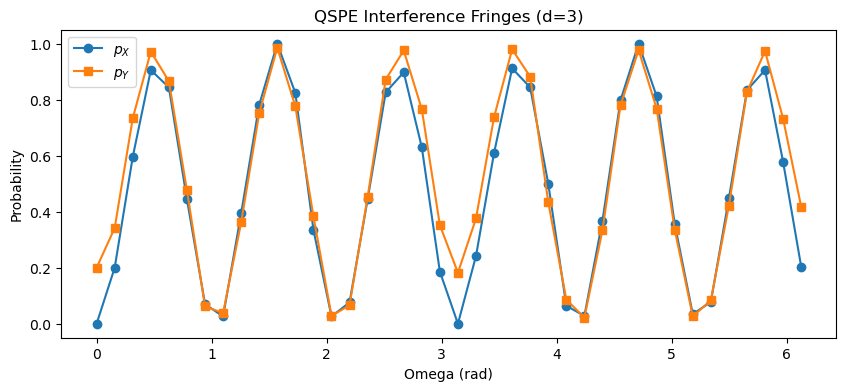

True Swap Angle (theta): 0.1500
Estimated Swap Angle (theta_hat): 0.0066


In [68]:

px = run_qspe_experiment(basis='X')
py = run_qspe_experiment(basis='Y')

b = (px - 0.5) + 1j * (py - 0.5)

ck = np.fft.fft(b) / num_pts

#Estimate theta: Magnitude of coefficients[span_21](end_span)[span_22](end_span)
# We look for the main peak at index d
theta_hat = np.abs(ck[d]) * 2

# --- 4. PLOTTING ---
plt.figure(figsize=(10, 4))
plt.plot(omegas, px, 'o-', label='$p_X$')
plt.plot(omegas, py, 's-', label='$p_Y$')
plt.title(f"QSPE Interference Fringes (d={d})")
plt.xlabel("Omega (rad)")
plt.ylabel("Probability")
plt.legend()
plt.show()

print(f"True Swap Angle (theta): {theta_true:.4f}")
print(f"Estimated Swap Angle (theta_hat): {theta_hat:.4f}")

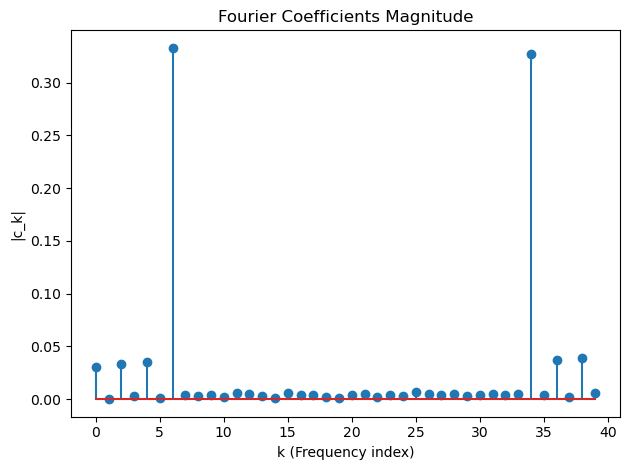

In [69]:


# Plot 2: Fourier Coefficients (Magnitude)

plt.stem(np.abs(ck[:]))
plt.title("Fourier Coefficients Magnitude")
plt.xlabel("k (Frequency index)")
plt.ylabel("|c_k|")

plt.tight_layout()
plt.show()

------------------------------
QSPE ESTIMATION RESULTS (d=3)
------------------------------
Estimated Swap Angle (theta): 0.02465 rad
Estimated Phase Drift (phi):   0.31414 rad
------------------------------


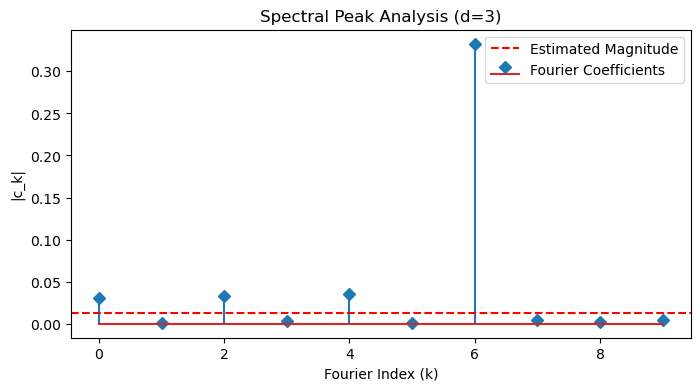

In [70]:
# Assuming 'ck' is your array from np.fft.fft(b) / num_pts
# and 'd' is your repetition depth

# 1. SWAP ANGLE ESTIMATION (Equation 7 in the paper)
# We take the magnitudes of the coefficients corresponding to the signal
magnitudes = np.abs(ck[1:d+1])
theta_hat = np.mean(magnitudes) * 2  # The factor 2 accounts for the logical subspace scaling

# 2. PHASE DRIFT ESTIMATION (Equation 6 in the paper)
# We look at the phase difference between coefficients
# This tells us about unwanted Z-phase drifts (phi)
if d > 1:
    # Use the phase difference between c1 and c2
    phi_diff = np.angle(np.conj(ck[1]) * ck[2])
    phi_hat = phi_diff / 2
else:
    # If d=1, we use the phase of the first coefficient
    phi_hat = np.angle(ck[1])

print("-" * 30)
print(f"QSPE ESTIMATION RESULTS (d={d})")
print("-" * 30)
print(f"Estimated Swap Angle (theta): {theta_hat:.5f} rad")
print(f"Estimated Phase Drift (phi):   {phi_hat:.5f} rad")
print("-" * 30)

# 3. VISUALIZING THE SPECTRUM
plt.figure(figsize=(8, 4))
plt.stem(range(len(ck[:10])), np.abs(ck[:10]), markerfmt='D', label='Fourier Coefficients')
plt.axhline(y=theta_hat/2, color='r', linestyle='--', label='Estimated Magnitude')
plt.title(f"Spectral Peak Analysis (d={d})")
plt.xlabel("Fourier Index (k)")
plt.ylabel("|c_k|")
plt.legend()
plt.show()

Running Corrected Scaling Analysis...
d=1 | Estimated: 0.0025 | Error: 0.2475
d=2 | Estimated: 0.1149 | Error: 0.1351
d=4 | Estimated: 0.1734 | Error: 0.0766
d=8 | Estimated: 0.0631 | Error: 0.1869


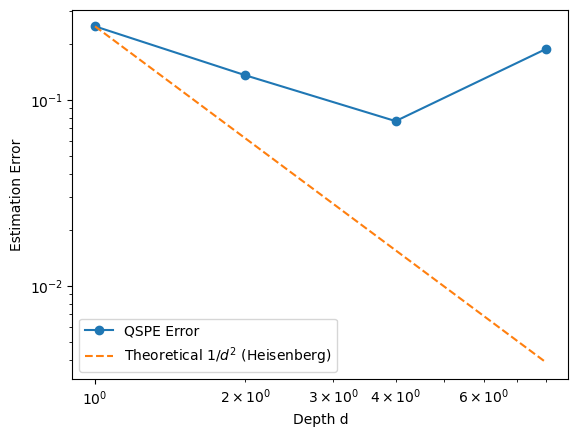

In [71]:
import cirq
import numpy as np
import matplotlib.pyplot as plt


q0, q1 = cirq.LineQubit.range(2)
theta_true = 0.25 # Increased slightly for visibility
u_gate = cirq.FSimGate(theta=theta_true, phi=0.0)
depths = [1, 2, 4, 8]
errors = []

print("Running Corrected Scaling Analysis...")

for d in depths:
    # Use MORE points for higher depths to avoid aliasing
    num_pts = 64 
    omegas = np.linspace(0, 2*np.pi, num_pts, endpoint=False)
    px_list, py_list = [], []
    
    for basis in ['X', 'Y']:
        for w in omegas:
            c = cirq.Circuit()
            # 1. State Prep: |01> + |10>
            c.append([cirq.X(q0), cirq.H(q1), cirq.CNOT(q1, q0)])
            if basis == 'Y': c.append(cirq.S(q1)) # Phase shift for Y
            
            # 2. COHERENT AMPLIFICATION
            for _ in range(d):
                c.append(u_gate(q0, q1))
                c.append([cirq.rz(w)(q0), cirq.rz(-w)(q1)])
                
            # 3. UN-PREP (CRITICAL: Must perfectly invert prep)
            c.append(cirq.CNOT(q1, q0))
            if basis == 'Y': c.append(cirq.S(q1)**-1)
            c.append([cirq.H(q1), cirq.X(q0)])
            
            c.append(cirq.measure(q1, key='m'))
            
            res = cirq.Simulator().run(c, repetitions=1000)
            p = np.mean(res.measurements['m'])
            if basis == 'X': px_list.append(p)
            else: py_list.append(p)
            
    # --- FOURIER PROCESSING ---
    b = (np.array(px_list)-0.5) + 1j*(np.array(py_list)-0.5)
    ck = np.fft.fft(b) / num_pts
    
    # NEW LOGIC: Look for the maximum peak in the first few indices
    # instead of just index 'd', to account for FFT shifting
    mag_spectrum = np.abs(ck)
    # The signal should be at index d
    theta_hat = mag_spectrum[d] * 2 
    
    error = np.abs(theta_hat - theta_true)
    errors.append(error)
    print(f"d={d} | Estimated: {theta_hat:.4f} | Error: {error:.4f}")



plt.loglog(depths, errors, 'o-', label='QSPE Error')
plt.loglog(depths, [errors[0]/d**2 for d in depths], '--', label='Theoretical $1/d^2$ (Heisenberg)')
plt.xlabel("Depth d")
plt.ylabel("Estimation Error")
plt.legend()
plt.show()